# Statistical Thinking in Python  I

## Graphical exploratory data analysis

        Explanatory data analysis can never be the whole story, 
        but nothing else can serve as the foundation stone -- John Tukey 
        
Look before you leap! A very important proverb, indeed. Prior to diving in headlong into sophisticated statistical inference techniques, you should first explore your data by plotting them and computing simple summary statistics. This process, called exploratory data analysis, is a crucial first step in statistical analysis of data. So it is a fitting subject for the first chapter of Statistical Thinking in Python.        

### Plotting a histogram of iris data

In [2]:
import numpy as np

# np.savetxt('setosa_petal_length.txt', setosa_petal_length, delimiter=',') # save ndarray to textfile
versicolor_petal_length = np.genfromtxt('datasets/versicolor_petal_length.txt', delimiter=',') #load ndarray from textfile
print(versicolor_petal_length)

[ 4.7  4.5  4.9  4.   4.6  4.5  4.7  3.3  4.6  3.9  3.5  4.2  4.   4.7  3.6
  4.4  4.5  4.1  4.5  3.9  4.8  4.   4.9  4.7  4.3  4.4  4.8  5.   4.5  3.5
  3.8  3.7  3.9  5.1  4.5  4.5  4.7  4.4  4.1  4.   4.4  4.6  4.   3.3  4.2
  4.2  4.2  4.3  3.   4.1]


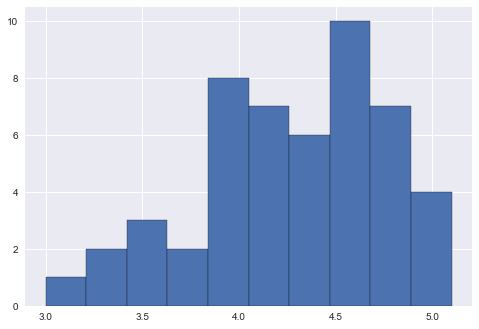

In [3]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Force to show outlines or borders on bins
plt.rcParams["patch.force_edgecolor"] = True

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

### Axis labels!

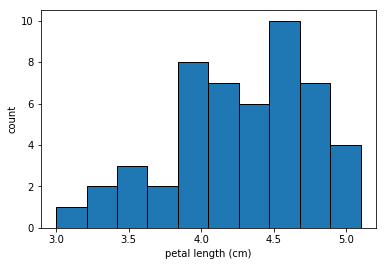

In [32]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length, edgecolor = 'black')

# Label axes

_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram

plt.show()

### Adjusting the number of bins in a histogram

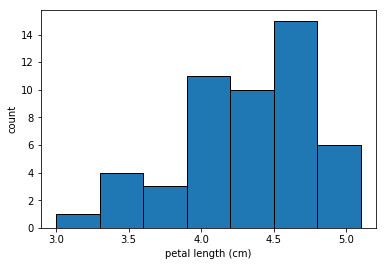

In [31]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins, edgecolor = 'black')

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()


In [8]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

X = iris.data[:, :2]# we only take the first two features.

print(list(data.target_names))
Y = iris.target

print(type(X))
print(type(Y))

df = pd.DataFrame(data.data, columns=data.feature_names)

df['species'] = Y # Add target column as new column to DataFrame

df[df['species'] == 0]

print(df.head())
print(df.tail())


# data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                      columns= iris['feature_names'] + ['target'])

# print(data1.head())


NameError: name 'data' is not defined

### Swarm plot

In [9]:
# Create bee swarm plot with Seaborn's default settings
_=sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_=plt.xlabel('species')
_=plt.ylabel('petal length')

# Show the plot

plt.show()

NameError: name 'sns' is not defined

### Computing the ECDF (Plotting all of your data: Empirical cumulative distribution functions)

Problem: Use a graph (ex. a Swarm plot, shown above). Try to figure out how the plot should be if we want to show the number of votes for Obama vs the name of the States. When we work with a huge number of datapoints, it's more graphical and easier to understand if we use ECDF. 

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n # n+1 because the last element is not inclusive. 0 <= Y <= 1

    return x, y

A, B = ecdf(versicolor_petal_length)

print("X: ", A, "\n\nY: ", B)

X:  [ 3.   3.3  3.3  3.5  3.5  3.6  3.7  3.8  3.9  3.9  3.9  4.   4.   4.   4.
  4.   4.1  4.1  4.1  4.2  4.2  4.2  4.2  4.3  4.3  4.4  4.4  4.4  4.4  4.5
  4.5  4.5  4.5  4.5  4.5  4.5  4.6  4.6  4.6  4.7  4.7  4.7  4.7  4.7  4.8
  4.8  4.9  4.9  5.   5.1] 

Y:  [ 0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2   0.22  0.24
  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42  0.44  0.46  0.48
  0.5   0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66  0.68  0.7   0.72
  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9   0.92  0.94  0.96
  0.98  1.  ]


### Plotting the ECDF

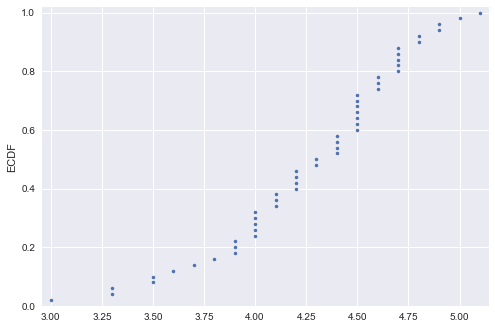

In [10]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot

_= plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Make the margins nice
_=plt.margins(0.02)

# Label the axes
_=plt.xlabel('')
_=plt.ylabel('ECDF')


# Display the plot

_=plt.show()

### Comparison of ECDFs

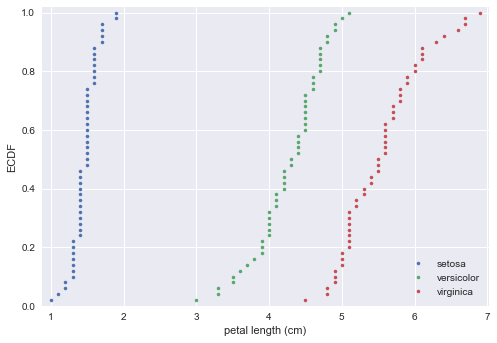

In [11]:
import numpy as np

# Load data from txt and create ndarray

setosa_petal_length = np.genfromtxt('datasets/setosa_petal_length.txt', delimiter=',')
versicolor_petal_length = np.genfromtxt('datasets/versicolor_petal_length.txt', delimiter=',')
virginica_petal_length = np.genfromtxt('datasets/virginica_petal_length.txt', delimiter=',')

# Compute ECDFs

x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot

_=plt.plot(x_set, y_set, marker='.', linestyle='none')
_=plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_=plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Make nice margins

_=plt.margins(0.02)
_=plt.margins(0.02)
_=plt.margins(0.02)

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## Quantitative exploratory data analysis

In the last chapter, you learned how to graphically explore data. In this chapter, you will compute useful summary statistics, which serve to concisely describe salient features of a data set with a few numbers.


### Computing means

In [12]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)


# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


### Percentiles, outliers, and box plots. Computing percentiles.

Median is the name for the 50th percentile, that means that 50% of the data is less than the median. 

In [13]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[ 3.3     4.      4.35    4.6     4.9775]


### Comparing percentiles to ECDF

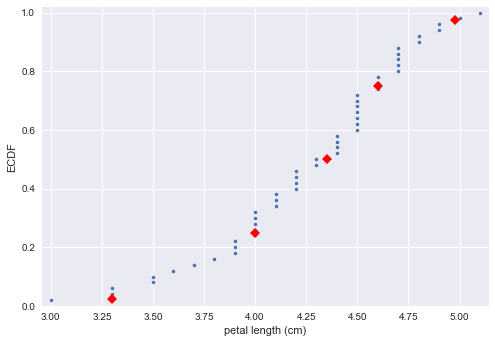

In [14]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot

_=plt.show()

### Box-and-whisker plot

In [15]:
# Create box plot with Seaborn's default settings
_=sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_=plt.xlabel('species')
_=plt.ylabel('petal length (cm)')

# Show the plot
_=plt.show()

NameError: name 'df' is not defined

### Computing the variance

In [16]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_np, variance_explicit)

0.2164 0.2164


### The standard deviation and the variance

In [17]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.465188133985
0.465188133985


### Scatter plots

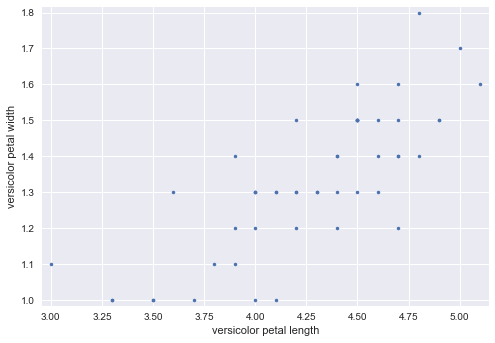

In [18]:
# Load numpy array from textfile
versicolor_petal_width = np.genfromtxt('datasets/versicolor_petal_width.txt', delimiter=',') 

# Make a scatter plot
_=plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Set margins
_=plt.margins(0.02)

# Label the axes
_=plt.xlabel('versicolor petal length')
_=plt.ylabel('versicolor petal width')

# Show the result
_=plt.show()

### Computing the covariance

Covariance is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.

<img src="images/g-covariance.gif" />

#### Examples

Calculate covariance for the following data set:
x: 2.1, 2.5, 3.6, 4.0 (mean = 3.1)
y: 8, 10, 12, 14 (mean = 11)

Substitute the values into the formula and solve:

> Cov(X,Y) = ΣE((X-μ)(Y-ν)) / n-1

= (2.1-3.1)(8-11)+(2.5-3.1)(10-11)+(3.6-3.1)(12-11)+(4.0-3.1)(14-11) /(4-1)
= (-1)(-3) + (-0.6)(-1)+(.5)(1)+(0.9)(3) / 3
= 3 + 0.6 + .5 + 2.7 / 3
= 6.8/3
= 2.267

The result is positive, meaning that the variables are positively related.

Note on dividing by n or n-1:
When dealing with samples, there are n-1 terms that have the freedom to vary (see: Degrees of Freedom). If you are finding the covariance of just two random variables, just divide by n.

#### Problems with Interpretation

A large covariance can mean a strong relationship between variables. However, you can’t compare variances over data sets with different scales (like pounds and inches). A weak covariance in one data set may be a strong one in a different data set with different scales.

The main problem with interpretation is that the wide range of results that it takes on makes it hard to interpret. For example, your data set could return a value of 3, or 3,000. This wide range of values is cause by a simple fact; The larger the X and Y values, the larger the covariance. A value of 300 tells us that the variables are correlated, but unlike the correlation coefficient, that number doesn’t tell us exactly how strong that relationship is. The problem can be fixed by dividing the covariance by the standard deviation to get the correlation coefficient.

> Corr(X,Y) = Cov(X,Y) / σXσY

#### Advantages of the Correlation Coefficient

The Correlation Coefficient has several advantages over covariance for determining strengths of relationships:

* Covariance can take on practically any number while a correlation is limited: -1 to +1.
* Because of it’s numerical limitations, correlation is more useful for determining how strong the relationship is between the two variables.
* Correlation does not have units. Covariance always has units
* Correlation isn’t affected by changes in the center (i.e. mean) or scale of the variables

Source: http://www.statisticshowto.com/covariance/


### Covariance matrix or dispersion matrix

The mean vector consists of the means of each variable and the variance-covariance matrix consists of the variances of the variables along the main diagonal and the covariances between each pair of variables in the other matrix positions.

The formula for computing the covariance of the variables X and Y is

> COV=∑ni=1(Xi−x¯)(Yi−y¯)n−1,

with x¯ and y¯ denoting the means of X and Y, respectively.

> The variance-covariance matrix has the following structure:

[[var(x), cov(x,y)], [cov(x,y), var(y)]]

where: 
 
 * var(x)=1n−1∑(xi−x¯)2var(x)=1n−1∑(xi−x¯)2 
 * and cov(x,y)=1n−1∑(xi−x¯)(yi−y¯)cov(x,y)=1n−1∑(xi−x¯)(yi−y¯).

#### Example

 X1 | X2
 ---|---
 3  | 7
 2  | 4

* **x¯=(3+2)2=52x¯=(3+2)2=52**
* **y¯=(7+4)2=112y¯=(7+4)2=112**
* var(x)=(3−52)2+(2−52)2var(x)=(3−52)2+(2−52)2
* var(y)=(7−112)2+(4−112)2var(y)=(7−112)2+(4−112)2
* cov(x,y)=(3−52)(7−112)+(2−52)(4−112)
 
source: https://math.stackexchange.com/questions/710214/how-to-construct-a-covariance-matrix-from-a-2x2-data-set 
 

In [19]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)


# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov=covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[ 0.22081633  0.07310204]
 [ 0.07310204  0.03910612]]
0.0731020408163


### Computing the Pearson correlation coefficient

In [20]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)    

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.786668088523


## Thinking probabilistically-- Discrete variables

Data speak a probabilistic language. Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary, therefore probability provides a measure of uncertainty.

In probability and statistics, a probability mass function (PMF) is a function that gives the probability that a discrete random variable is exactly equal to some value.

### Bernouilli trial

Bernoulli trial (or binomial trial) is a random experiment with exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted.

The probability mass function (PMF) f of this distribution, over possible outcomes k, is


$$ f(k;p)=\begin{cases}p&{\text{if }}k=1,\\[6pt]1-p&{\text{if }}k=0.\end{cases}$$

### Binomial distribution

That is, with a binomial distribution you have a certain number, n, of "attempts," each of which has probability of success p. The binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent dichotomic experiments with only two possible boolean outcomes, one with probability p and the other with probability q = 1 − p. A single T/F experiment is also called a Bernoulli trial and a sequence of outcomes is called a Bernoulli process; for a single trial, i.e., n = 1, the binomial distribution is a Bernoulli distribution. 



### Generating random numbers using the np.random module

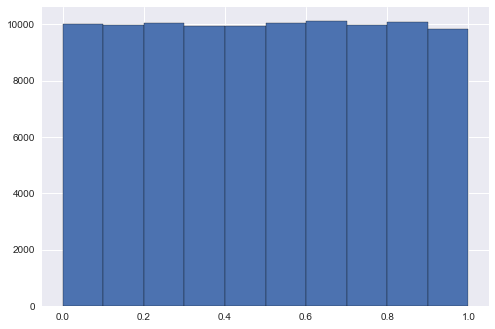

In [21]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers, edgecolor = 'black')

# Show the plot
plt.show()

### The np.random module and Bernoulli trials

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. 

In [22]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success +=1

    return n_success

### How many defaults might we expect?

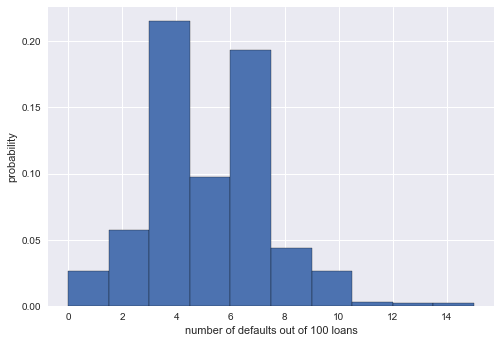

In [23]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True, edgecolor = 'black')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot

_ = plt.show()


### Will the bank fail?

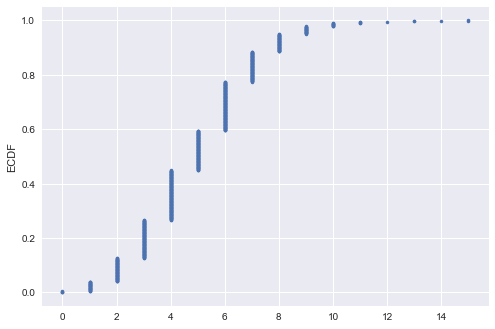

Probability of losing money = 0.022


In [24]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('')
plt.ylabel('ECDF')

# Show the plot

plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


### Sampling out of the Binomial distribution

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with np.random.seed(42)) to save you typing that each time.

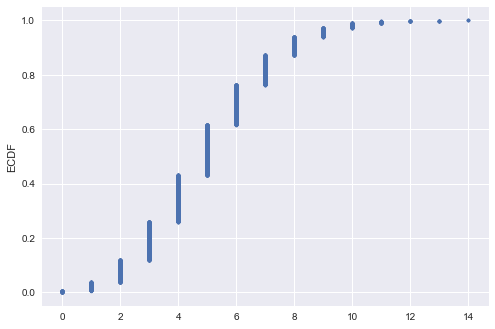

In [25]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('')
plt.ylabel('ECDF')

# Show the plot
plt.show()

### Plotting the Binomial PMF

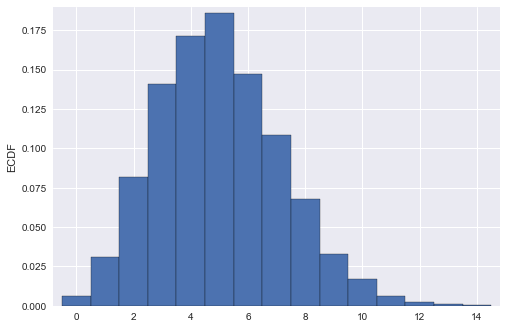

In [26]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_=plt.hist(n_defaults, normed=True, bins=bins, edgecolor = 'black')

# Set margins
_=plt.margins(0.02)

# Label axes
_=plt.xlabel('')
_=plt.ylabel('ECDF')

# Show the plot

_=plt.show()

## Thinking probabilistically-- Continous variables

Analogously to PMF to discrete variables -a dice, a coin, etc-, we use probability density function (PDF) to continous variables -speed of light, the speed of a train, etc. -. It's the mathematical description of a relative likehood of observing a value of a continuous variable. Considering the probability of mesuring a single value for a continuous variable it does not make sense because there is an infinitive of possible numbers between a range. 

### Poisson processes and the Poisson distribution

In Poisson Ville -Information Theory Inference And Learning Algorithms, David J C Mackay- the amount of time you have to wait for a bus, is completely independependent of when the previous bus arrived, if you see a bus leaving, the next one could arrive almost inmediately or you could stay there waiting for hours. This is described as a Poisson process: the timing of one effect is completely independent of when the previous event happened. Many processess occur in this way: natual births in a given hospital, hits on a website during a given hour, meteor strikes, molecular collision in a gas, meteor strikes, etc.   

[With a Poisson distribution, you essentially have infinite attempts, with infinitesimal chance of success. That is, given a Binomial distribution with some n,p, if you let n→∞ and p→0 in such a way that np→λ, then that distribution approaches a Poisson distribution with parameter λλ][1].

### Relationship between Binomial and Poisson distributions

**Poisson distribution is a limit of the Binomial distribution for rare events**. Because of this limiting effect, Poisson distributions are used to model occurences of events that could happen a very large number of times, but happen rarely. **That is, they are used in situations that would be more properly represented by a Binomial distribution with a very large n and small p**, especially when the exact values of n and p are unknown. (Historically, the number of wrongful criminal convictions in a country)


[1]: https://math.stackexchange.com/questions/1050184/difference-between-poisson-and-binomial-distributions

In [27]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson

# Using the np.random.poisson() function, draw 10000 samples from a Poisson distribution with a mean of 10.
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0145 3.17135456075
n = 20 Binom: 10.0592 2.23523944131
n = 100 Binom: 10.0441 2.994253695
n = 1000 Binom: 10.0129 3.13963908595


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

### How many no-hitters in a season?

In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

<img src="images/ecdf_no_hitters_binomial.jpg">

Note: The no-hitter data set was scraped and calculated from the data sets available at retrosheet.org (license).

**[_] Discrete uniform**

If all possibilities of of number of no-hitters were equally likely, what would set the maximum? Possibly the total number of games in a season. If this were the case, a huge number of no-hitters would be equally as probable as none. Does this make sense?

**[_] Binomial**

Yes, it is Binomial, with each game being a Bernoulli trial. But think about how you can determine the parameters, n and p of the distribution. Further, is p small and n large?

**[_] Poisson**

Yes, you can use the Poisson distribution. But remember: the Poisson distribution is a limit of the Binomial distribution when the probability of success is small and the number of Bernoulli trials is large.

**[X] Both Binomial and Poisson, though Poisson is easier to model and compute.**


** [_] Both Binomial and Poisson, though Binomial is easier to model and compute.**

Yes, the Binomial or Poisson distribution correctly describe the number of no-hitters in a given amount of games. However, the Poisson distribution has a single parameter, while the Binomial distribution has two, as discussed in the previous exercise.

### Was 2015 anomalous?

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [28]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0072


## Probability density function (PDF)

Analogously to PMF to discrete variables -a dice, a coin, etc-, we use probability density function (PDF) to continous variables -speed of light, the speed of a train, etc. -. It's the mathematical description of a relative likehood of observing a value of a continuous variable. Considering the probability of mesuring a single value for a continuous variable it does not make sense because there is an infinitive of possible numbers between a range. 

<img src="images/michelson_experiment.jpg" />



Instead we can use the normal and the area under the curve descrived by the data. For instance, the probability of mesuring the speed of light is greater than 300.000 km/s is the area under the normal curve. Parametrizing the PDF based on Michelson's experiments, this is a 3% chance, since the peak region is about 3% of the total area under the PDF. 

<img src="images/normal_pdf.jpg" />

To do these calculations we look to the cummulative distribution function or CDF. This is the CDF of the normal PDF distribution.

<img src="images/pdf_cdf_michelson.jpg" />



### Interpreting PDFs

Consider the PDF shown. Which of the following is true?
<img src="images/exercise1_pdf.jpg" />

* **[x] x is more likely than not less than 10.**

The probability is given by the area under the PDF, and there is more area to the left of 10 than to the right.

* [_] x is more likely than not greater than 10.

Remember, probability is given by the area under the *PDF, not the value of the PDF.
 
* [_] We cannot tell from the PDF if x is more likely to be greater than or less than 10.
* [_] This is not a valid PDF because it has two peaks.



### Interpreting CDFs

At right is the CDF corresponding to the PDF you considered in the last exercise. Using the CDF, what is the probability that x is greater than 10?

<img src="images/interpreting_cdf.jpg" />

* [X] 0.25

Correct! The value of the CDF at x = 10 is 0.75, so the probability that x < 10 is 0.75. Thus, the probability that x > 10 is 0.25.

* [_]0.75

* [_]3.75

* [_]15


## Introduction to the Normal distribution

Describes a continuous variable whose PDF has a simmetric and single peak. It is parametrized by mean -center of the peak- and standard deviation -how wide the peak is or how spread out the data are-. The normal distribution is also called Gaussian distribution -Johann Carl Friedrich Gauss, April 1777-.

* > Mean of a normal distribution != Mean computed from data
* > Std dev of a normal distribution != Std dev computed from data

<img src="images/normal_distrib_and_data.jpg" />

From the histogram on the right, we can see the measure of the speed of light looks to be normally distributed. Comparing the histogram to the PDF, suffers of certain binding bias, that's why it's better to compare ECDF to the theoretical ECDF of the normal distribution.  

### The Normal PDF

In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

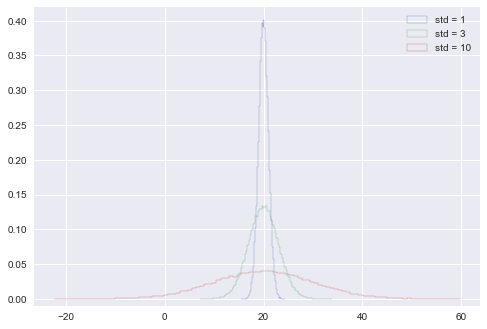

In [29]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(20, 1, size=100000) # parameters: mean, std, number of samples
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)


# Make histograms

plt.hist(samples_std1, bins=100, normed=True, histtype='step')
plt.hist(samples_std3, bins=100, normed=True, histtype='step')
plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


### The Normal CDF

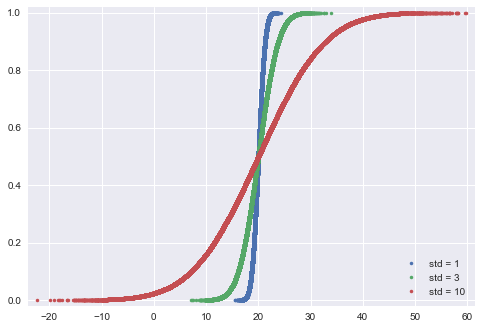

In [30]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

## Normal distribution: properties and warnings

### Are the Belmont Stakes results Normally distributed?

The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

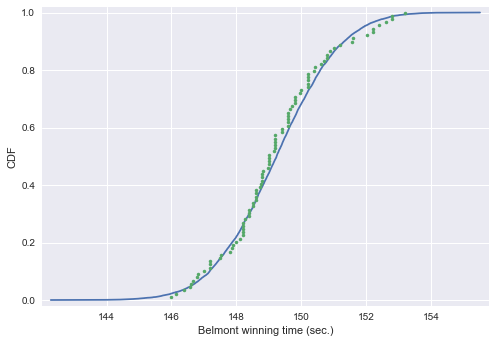

In [43]:
belmont_no_outliers = np.genfromtxt('datasets/belmont_no_outliers.txt', delimiter=',') #load ndarray from textfile
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers) 

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


### What are the chances of a horse matching or beating Secretariat's record?

In [35]:
mu=149.221011236
sigma=1.62781647177

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000706


### Optimal parameters

Outcomes of measurements draws a probability distribution defined by the story of how the data came to be. Looking to Michelson measurements about the speed of light, we assumed that the data was normally distributed by looking both the PDF and the CDF which is more effective because there is not bias. To check the normality:
* compute mean of the data
* compute std of the data
* generate a ndarray of normal distribute samples according to the mean and std of the real data
* plot the two graphs overlayed. If the actual data is normally distributed, both CDF curves are beautifully overlaid.


## The exponential distribution

In Poisson Ville, the number of arriving buses that will arrive per hour, is Poisson distributed, but the amount of time between arrivals is exponentially distributed. 

### Simulate exponential distribution

In [37]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

### Distribution of no-hitters and cycles
Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. 

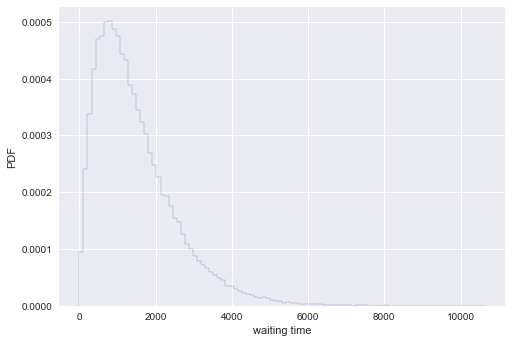

In [38]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
plt.hist(waiting_times, bins=100, normed=True, histtype='step')

# Label axes
plt.xlabel('waiting times')
plt.ylabel('PDF')

# Show the plot
plt.show()

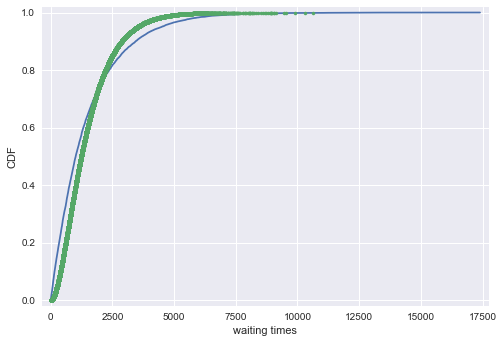

In [42]:
# Mean calculation
mean = np.mean(waiting_times)
samples = np.random.exponential(mean, size=10000)

# ECDF vs ECDF theoretical
x, y = ecdf(waiting_times)
x_theor, y_theor = ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('waiting times')
_ = plt.ylabel('CDF')
plt.show()